In [1]:
import numpy as np
import matplotlib.pyplot as mp
import matplotlib.ticker as tick
import numpy.fft as fft
import os
import scipy.optimize as opt
import scipy.stats as stat
from jupyterthemes import jtplot

In [2]:
jtplot.reset()
mp.rcParams["figure.figsize"] = (5*16/9, 5)
mp.rcParams["figure.dpi"] = 100
mp.rcParams["text.usetex"] = True
mp.rcParams["font.family"] = "serif"

In [3]:
rate = 30

In [4]:
def g(t, a, w, phi, b, c):
    return a*np.sin(w*t + phi) * np.exp(-b*t) + c

In [5]:
def readcsv(filename):
    mass = float(filename[:-5]) * 1e-3
    t, x, v, a = np.genfromtxt(filename, skip_header=7).T
    popt, pcov = opt.curve_fit(g, t, x, bounds=([0, 0, -np.inf, 0, -np.inf], np.inf))
    f = popt[1]/2/np.pi
    return mass, f

In [6]:
mlist = []
flist = []

for _, __, files in os.walk("."):
    for file in files:
        if file.endswith(".txt"):
            mass, f = readcsv(file)
            mlist.append(mass)
            flist.append(f)
            
M = np.array(mlist)
f = np.array(flist)
T = 1/f

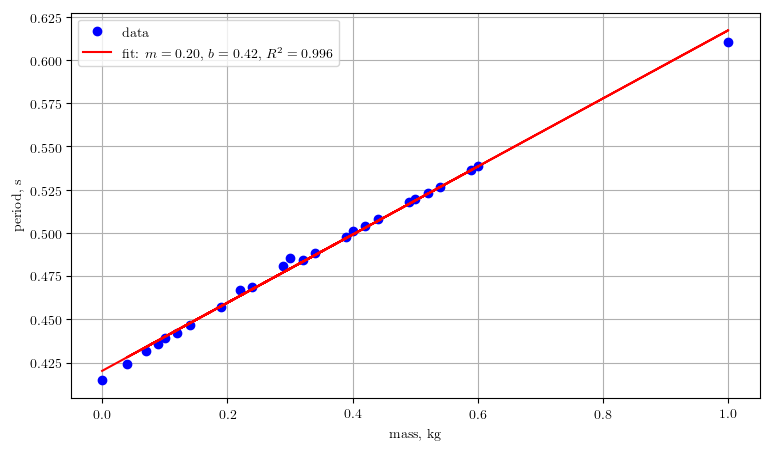

In [8]:
m, b, R, p, sd = stat.linregress(M, T)

mp.plot(M, T, "bo", label="data")
mp.plot(M, m*M + b, "r-", 
        label=r"fit: $m = %.2f$, $b = %.2f$, $R^2 = %.3f$"%(m, b, R**2))
mp.xlabel("mass, kg")
mp.ylabel("period, s")
mp.legend()
mp.grid()
mp.show()